In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

### Scenario 3: EduFun Nursery
    Industry: Educational
    EduFun nursery is one of the top nurseries in philadelphia. Every year thousands of parents apply for their
    child's admission here. Due to excessive number of applications there was objective to reject these
    applicatios with proper response too. So the board decided to classify the applications based on occupation
    of parents and child's nursery, family structure and financial standing, and social and health picture of the
    family.
    
    Tasks to be Performed:
    
    Import the required libraries
    Prepare the data (Data Proprocessing)
    Check for missing value
    Explore the data using EDA
    Training a logistic regression model
    Evaluating the mode

In [13]:
df = pd.read_csv('nursery.csv', names=['parents', 
                                       'has_nursery', 
                                       'form', 
                                       'Children', 
                                       'housing',
                                      'finance',
                                      'social',
                                      'health',
                                       'NURSERY'
                                      ], header=None)
df.head()

,parents,has_nursery,form,Children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [14]:
print(f"Shape: {df.shape}")

Shape: (12960, 9)


In [15]:
df.isna().sum()

parents        0
has_nursery    0
form           0
Children       0
housing        0
finance        0
social         0
health         0
NURSERY        0
dtype: int64

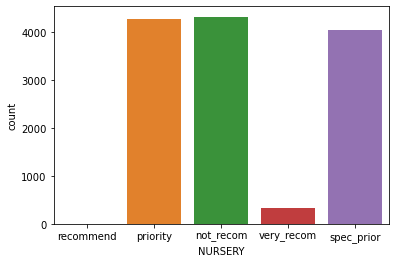

In [16]:
sns.countplot(df['NURSERY'])
plt.show()

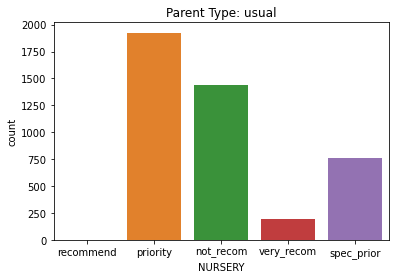

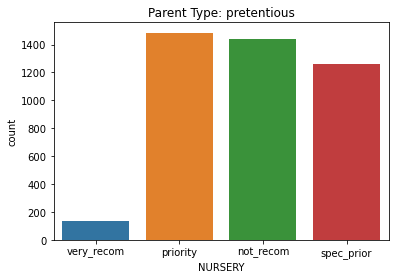

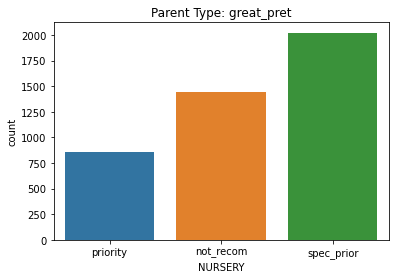

In [19]:
#By parent type
for value in df['parents'].unique():
    parent_df = df[df['parents'] == value]
    sns.countplot(parent_df['NURSERY'])
    plt.title(f"Parent Type: {value}")
    plt.show()

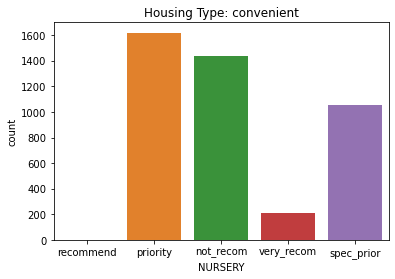

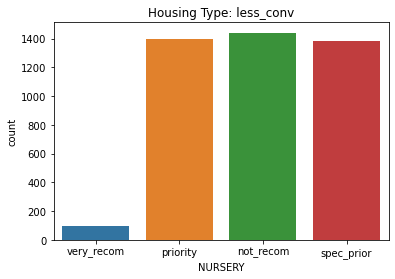

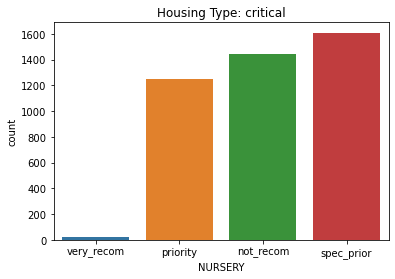

In [20]:
#By parent type
for value in df['housing'].unique():
    parent_df = df[df['housing'] == value]
    sns.countplot(parent_df['NURSERY'])
    plt.title(f"Housing Type: {value}")
    plt.show()

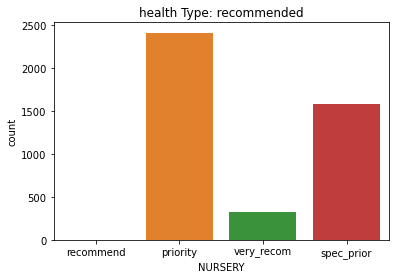

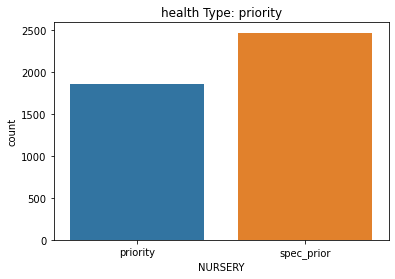

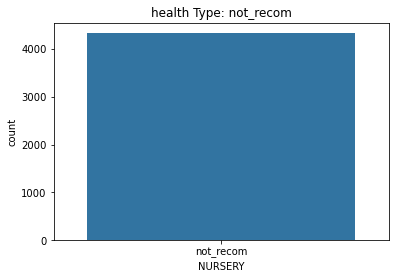

In [21]:
#By parent type
for value in df['health'].unique():
    parent_df = df[df['health'] == value]
    sns.countplot(parent_df['NURSERY'])
    plt.title(f"health Type: {value}")
    plt.show()

In [24]:
data_dum = pd.get_dummies(df, columns=['parents', 
                                       'has_nursery', 
                                       'form', 
                                       'Children', 
                                       'housing',
                                      'finance',
                                      'social',
                                      'health',
                                      ])

In [25]:
data_dum.head()

,NURSERY,parents_great_pret,parents_pretentious,parents_usual,has_nursery_critical,has_nursery_improper,has_nursery_less_proper,has_nursery_proper,has_nursery_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,recommend,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,priority,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,not_recom,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,recommend,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,priority,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_dum['NURSERY'] = le.fit_transform(data_dum['NURSERY'])

X = data_dum.iloc[:, 1:]
y = data_dum.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101) 

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9072, 27)
Shape of X_test: (3888, 27)
Shape of y_train: (9072,)
Shape of y_test: (3888,)


In [39]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[1291,    0,    0,    0],
       [   0, 1129,  109,   13],
       [   0,  147, 1099,    0],
       [   0,   33,    0,   67]], dtype=int64)

In [41]:
lr = LogisticRegression(C=0.5, solver='sag', multi_class='multinomial',max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=0.5, max_iter=1000, multi_class='multinomial',
                   solver='sag')

In [42]:
y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[1291,    0,    0,    0],
       [   0, 1133,  110,    8],
       [   0,  145, 1101,    0],
       [   0,   38,    0,   62]], dtype=int64)

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.9225823045267489

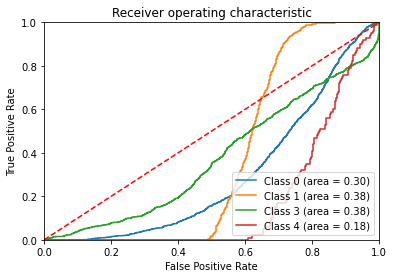

In [56]:
log_model_prob = lr.predict_proba(X_test).T
dummy_y_test = pd.get_dummies(y_test)

roc_auc = dict()
lfpr4 = dict()
ltpr6 = dict()
lthresholds4 = dict()

for i in dummy_y_test.columns:
    roc_auc[i] = metrics.roc_auc_score(dummy_y_test[i], log_model_prob[i-1])
    lfpr4[i], ltpr6[i], lthresholds4[i] = metrics.roc_curve(dummy_y_test[i], log_model_prob[i-1])
    
for i in dummy_y_test.columns: 
    cls=lr.classes_ 
    plt.plot(lfpr4[i], ltpr6[i], label='Class '+str(cls[i])+ ' (area = %0.2f)' % roc_auc[i])
    
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
